<a href="https://colab.research.google.com/github/hosseinrezaie0/CI-T.A-Dr.Helmi/blob/main/Neural%20Network/MLP/House%20Price%20Prediction/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, Y = data.data, data.target

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [15]:
x_train.shape

(16512, 8)

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(x_train.shape[1],)),
    Dense(64, activation='sigmoid'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

In [19]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.7519 - mae: 1.2811 - val_loss: 1.0628 - val_mae: 0.7994
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9958 - mae: 0.7793 - val_loss: 0.7441 - val_mae: 0.6626
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6847 - mae: 0.6319 - val_loss: 0.5716 - val_mae: 0.5582
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5497 - mae: 0.5473 - val_loss: 0.5168 - val_mae: 0.5356
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5076 - mae: 0.5275 - val_loss: 0.4848 - val_mae: 0.5113
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4758 - mae: 0.5077 - val_loss: 0.4792 - val_mae: 0.5247
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4668 - mae: 0.5051 - val_loss: 0.4532 - val_mae: 0.4936
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4494 - mae: 0.4900 - val_loss: 0.4431 - val_mae: 0.4814
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step -

In [20]:
loss_train = history.history['loss']
acc_train = history.history['mae']
loss_val = history.history['val_loss']
acc_val = history.history['val_mae']

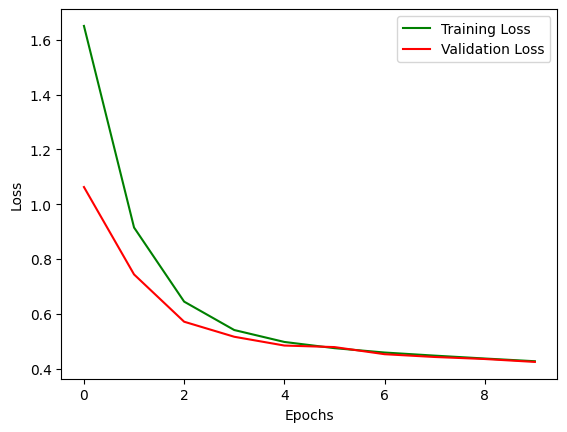

In [24]:
plt.plot(loss_train, label='Training Loss', color='g')
plt.plot(loss_val, label='Validation Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [22]:
loss, mae = model.evaluate(x_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4055 - mae: 0.4685
